# Stock market analysis
Dateset resource: https://dps.psx.com.pk/historical

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# read data of Ssystems Ltd
sys = pd.read_csv('Year_2018/SYS.csv')
netsol = pd.read_table('Year_2018/NETSOL.csv' , sep = ',')
ptc = pd.read_csv('Year_2018/PTC.csv')
avn = pd.read_csv('Year_2018/AVN.csv')
list_company = [sys,netsol,ptc,avn]
com_name = ['sys','netsol','ptc','avn']

## Section 1: Price Trends
### How much did the stock price of each company change over time?

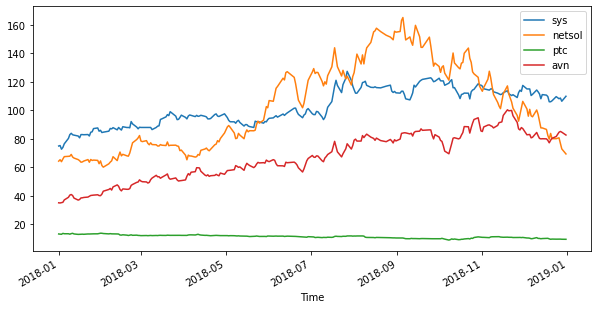

In [6]:
for l in range (len(list_company)):
    #correct the format of date
    list_company[l]['Time'] = pd.to_datetime(list_company[l].Time) # correct the format of date
    list_company[l] = list_company[l].set_index('Time') #Set Time column as row index
    list_company[l]['Close'].plot(label = com_name[l], figsize=(10,5), legend = True)
plt.show() #show the plot

Comment: It can be seen from the above line graph that, the stocks for NETSOL increased sharply in the begining of 2018 but then decreased dramatically. The stocks for PTC leveled off nearly all the time while AVN, SYS showed steady growth.

## Section 2: Daily Returns
### What were the daily returns for all the companies?

The pct_change function is called from a Series object, and it calculates the daily return for all rows based on the current and previous row value.

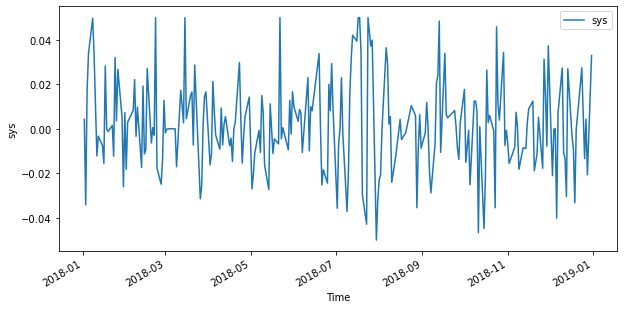

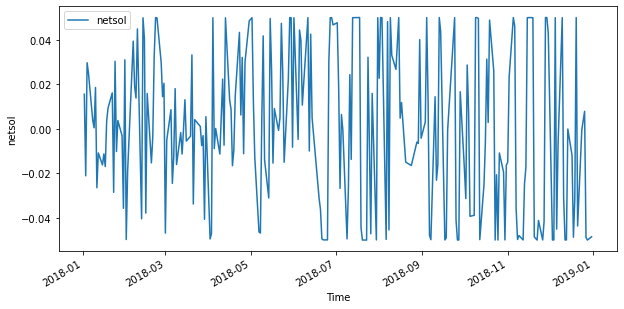

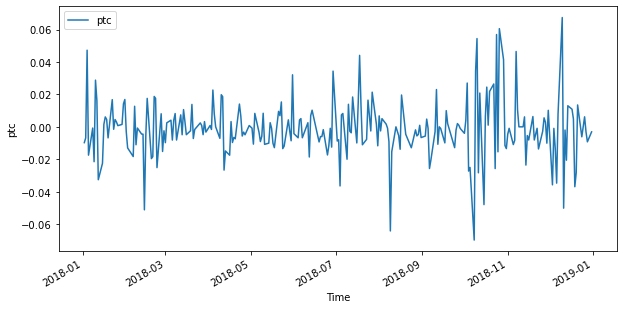

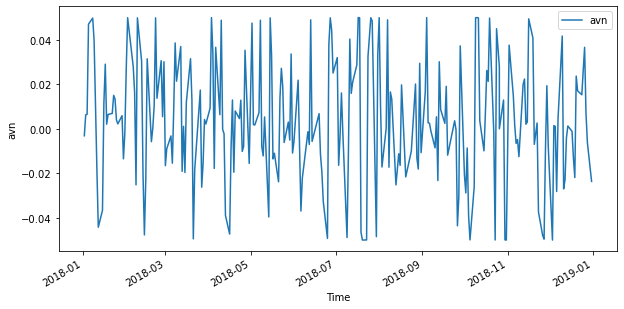

In [27]:
list_company = [sys,netsol,ptc,avn]
com_name = ['sys','netsol','ptc','avn']
for l in range(len(list_company)):
    list_company[l]['Time'] = pd.to_datetime(list_company[l].Time)
    list_company[l] = list_company[l].set_index('Time')
    daily_return = list_company[l]['Close'].pct_change() #calculate the daily returns
    list_company[l]['daily_return'] = daily_return
    plt.ylabel(com_name[l]) #assign a name to the y-axis of plot
    list_company[l]['daily_return'].plot(label = com_name[l], legend=True, figsize=(10,5))
    plt.show()

    

Comment: The stock with minimal change is considered a stable stock

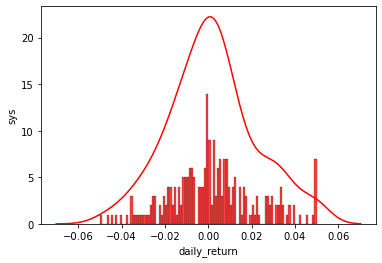

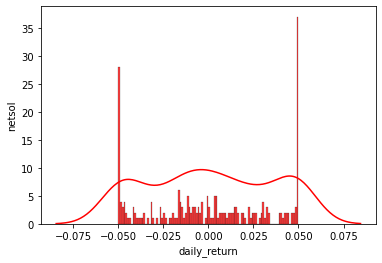

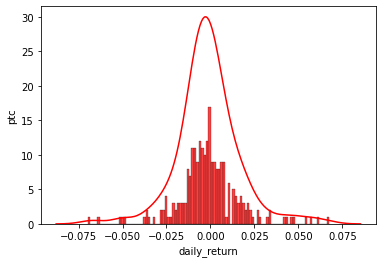

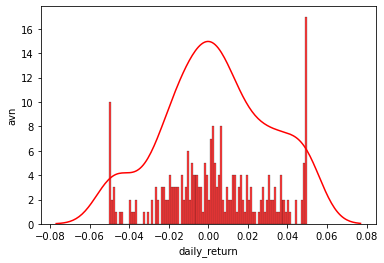

In [30]:
list_company = [sys,netsol,ptc,avn]
com_name = ['sys','netsol','ptc','avn']
for l in range(len(list_company)):
    list_company[l]['Time'] = pd.to_datetime(list_company[l].Time)
    list_company[l] = list_company[l].set_index('Time')
    daily_return = list_company[l]['Close'].pct_change() #calculate the daily returns
    list_company[l]['daily_return'] = daily_return
    plt.figure()
    plt.ylabel(com_name[l]) #assign a name to the y-axis of plot
    sns.kdeplot(list_company[l]['daily_return'].dropna(), color = 'red')
    sns.histplot(list_company[l]['daily_return'].dropna(), bins = 100, color = 'red')
    

Comment: The KDE plot informs us that most of the daily returns for System Ltd are close to zero. This tells us that the changes in price of this stock are not drastic and we can assume that System Ltd has a stable stock.

## Section 3: Price Trends
### How are the stocks of the companies related to each other?

Correlation is a statistical technique that determines how strongly two variables are related to each other and how a change in one would affect the other. It can also be defined as a measure of dependence between two or more quantities.

The two types of correlation, in terms of stock behavior, can be described as follows:

+ Positive correlation (0 and 1): The stock value of one company goes up, and in correlation with it, the stock values of other companies also go up.

+ Negative correlation (-1 and 0 - inclusive): The stock value of one company goes up, and in correlation with it, the stock values of other companies go down. 

A strong positive correlation has a score above 0.4. It is the same for the negative correlation; it’s strong below a -0.4 value. A score of 1 represents a perfect positive relationship and usually occurs when the correlation is taken with itself.

The closing price and daily return values will be used to find this correlation.

In [33]:
sec03_closing = pd.DataFrame({
    'SYS': sys['Close'],
    'NETSOL': netsol['Close'],
    'PTC': ptc['Close'],
    'AVN': avn['Close']
})
corr = (sec03_closing.dropna()).corr() #corr() function find correlations between its columns after dropping null values

<AxesSubplot:>

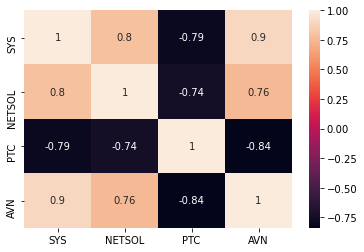

In [34]:
# Visualize with a heatmap
sns.heatmap(corr, annot = True)

In [37]:
sec03_return = sec03_closing.pct_change() #calculate all returns

<AxesSubplot:>

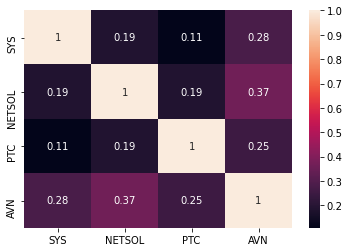

In [38]:
corr = (sec03_return.dropna()).corr() #corr() function find correlations between its columns after dropping null values
sns.heatmap(corr, annot = True)

Comment: From this correlation, it can be inferred that NETSOL and AVN are correlated in a positive way since the score is 0.37 which is a strong correlation.

## Section 4: Price Trends
### How much money do we risk losing by investing in a certain company?

The risk is the standard deviation of all the daily return values.

In [42]:
sec04_returns = sec03_return.dropna() #drop the null values
avg_daily_return = sec04_returns.mean() #mean of the daily return of all companies
daily_risk = sec04_returns.std() #standard deviation of the daily return of all companies

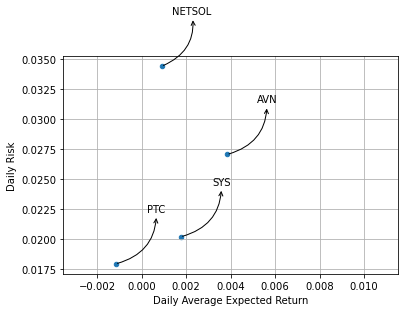

In [45]:
plt.xlabel("Daily Average Expected Return") #x-axis's name
plt.ylabel("Daily Risk") #y-axis's name

plt.xlim(sec04_returns.mean().min() + sec04_returns.mean().min()*2, sec04_returns.mean().max() + sec04_returns.mean().max()*2)

for label, x, y in zip(sec04_returns.columns, sec04_returns.mean(), sec04_returns.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '<-', connectionstyle = 'arc3,rad=-0.4'))

plt.grid() #add grid lines 

plt.scatter(avg_daily_return, daily_risk, s = 20) #s: size of the dots in the plot.

Comment:
- NETSOL has the highest loss since it has a little positive daily return.
- PTC has lowest risk value however its average daily return value is negative. This indicates that even though our losses would be little, there would not be a positive return for our investment.
- AVN has high positivve daily return.
- SYS also has high positive daily return and risk value is less than NETSOL so it can be considered as a good stock.
